# Problème Titanic Data Science

Le flux de travail de la solution du problème passe par les sept étapes suivantes :

1. Définition du problème.
2. Acquérir des données d'entraînement et de test.
3. Préparer et nettoyer les données.
4. Analyser, identifier les modèles et explorer les données.
5. Modéliser, prédire et résoudre le problème.
6. Visualiser, signaler et présenter les étapes de résolution du problème et la solution finale.
7. Soumettre les résultats.

Le flux précédent indique la séquence générale de la façon dont chaque étape peut suivre l'autre. Cependant, il existe des cas d'utilisation avec des exceptions.

* On peut combiner plusieurs étapes. On peut analyser en visualisant des données.
* Effectuer une étape plus tôt qu'indiqué. On peut analyser les données avant et après la préparation et le nettoyage.
* Effectuer une étape plusieurs fois. Visualiser l'étape peut être utilisé plusieurs fois.
* Laisser tomber une étape. Il se peut que nous n'ont pas besoin d'une étape d'approvisionnement pour produire ou activer notre jeu de données.

## Définition du problème

On définit le problème à résoudre ou les questions à poser tout en fournissant les ensembles de données pour la formation de votre modèle de science des données et en testant les résultats du modèle par rapport à un ensemble de données de test. 

Sachant qu'un ensemble d'échantillons de passagers ayant survécu ou n'ayant pas survécu à la catastrophe du Titanic a été dressé, notre modèle peut-il déterminer un ensemble de données de test ne contenant pas les informations de survie si ces passagers ont survécu ou non?

Voici les faits saillants à noter.

* Le 15 avril 1912, lors de son voyage inaugural, le Titanic a coulé après avoir heurté un iceberg, tuant 1502 des 2224 passagers et membres d'équipage qui se traduit par 32% de taux de survie.
* L'une des raisons pour lesquelles le naufrage a entraîné une telle perte de vie était qu'il n'y avait pas assez de canots de sauvetage pour les passagers et l'équipage.
* Bien qu'il y ait eu de la chance à survivre au naufrage, certains groupes de personnes avaient plus de chances de survivre que d'autres, comme les femmes, les enfants et la classe supérieure.

## Objectifs

Les étapes des solutions Data Science vont résoudre sept objectifs majeurs.

* __Classfication :__ On veut classifier nos échantillons. On peut également comprendre les implications ou la corrélation de différentes classes avec notre objectif de solution.

* __Corrélation :__ On peut aborder le problème en fonction des fonctionnalités disponibles dans l'ensemble de données d'apprentissage. Quelles fonctionnalités de l'ensemble de données contribuent de manière significative à notre objectif de solution? Statistiquement, y a-t-il une corrélation entre un objectif et une solution? Lorsque les valeurs des caractéristiques changent, l'état de la solution change-t-il également, et vice-versa? Cela peut être testé à la fois pour les caractéristiques numériques et catégorielles dans l'ensemble d'apprentissage donné. Corrélation de certaines fonctionnalités peut aider à créer, compléter ou corriger des fonctionnalités.

* __Conversion :__ Pour la phase de modélisation, il faut préparer les données selon le choix de l'algorithme du modèle. Il peut être nécessaire de convertir toutes les caractéristiques en valeurs numériques équivalentes. Ainsi, par exemple, convertir des valeurs catégorielles de texte en valeurs numériques.

* __Complétion :__ La préparation des données peut également nous obliger à estimer les valeurs manquantes dans une entité. Les algorithmes de modèle peuvent fonctionner mieux lorsqu'il n'y a pas de valeurs manquantes.

* __Correction :__ On peut également analyser l'ensemble de données d'entraînement donné pour déceler des erreurs ou des valeurs éventuellement inexactes à l'intérieur des caractéristiques et essayer de corroder ces valeurs ou d'exclure les échantillons contenant les erreurs. Une façon de le faire est de détecter les valeurs aberrantes parmi nos échantillons ou fonctionnalités. Nous pouvons également supprimer complètement une fonctionnalité si elle ne contribue pas à l'analyse ou peut fausser considérablement les résultats.

* __Création :__ On peut aussi créer de nouvelles fonctionnalités basées sur une fonctionnalité existante ou un ensemble de fonctionnalités, de sorte que la nouvelle fonctionnalité respecte les objectifs de corrélation, de conversion et d'exhaustivité.

* __Tracage :__ Comment sélectionner les bons graphiques de visualisation en fonction de la nature des données et des objectifs de la solution?

### Commentaires

* Combinez les données d'entraînement et de test pour certaines opérations, telles que la conversion d'un ensemble de données en valeurs numériques.

* Observation correcte; près de 30% des passagers avaient des frères et soeurs et/ou des conjoints à bord.

* Interpréter correctement les coefficients de régression logistique.

### Bonnes pratiques

* Spécifier les dimensions et les légendes dans les graphes.

* Effectuer une analyse de corrélation de caractéristiques au début du projet. 

* Utiliser plusieurs graphiques à la place des superpositions pour plus de lisibilité.

In [37]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import warnings
warnings.filterwarnings('ignore')

In [38]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

## Acquisition des données

On commençe par acquérir les ensembles de données d'entraînement et de test avec Pandas DataFrames. On combine également ces ensembles de données pour exécuter certaines opérations sur les deux ensembles de données ensemble.

In [40]:
train_df = pd.read_csv('disaster_train.csv')
test_df = pd.read_csv('disaster_test.csv')
combine = [train_df, test_df]

## Description des données

Pandas aide également à décrire les ensembles de données répondant aux questions suivantes au début de notre projet.

__Quelles sont les fonctionnalités disponibles dans l'ensemble de données?__

In [41]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


__Quelles caractéristiques sont catégoriques?__

* Les catégoriques : 'Survived', 'Sex', 'Embarked' et 'Pclass'.

__Quelles caractéristiques sont numériques?__

* Les continues : 'Age', 'Fare' et les discrètes : 'SibSp', 'Parch'.

In [42]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Quelles sont les caractéristiques des types de données mixtes?__

* 'Ticket' est un mélange de types de données numériques et alphanumériques et 'Cabin' est alphanumérique.

__Quelles fonctionnalités peuvent contenir des erreurs ou des fautes de frappe?__

Ceci est plus difficile à examiner pour un grand ensemble de données, mais l'examen de quelques échantillons d'un ensemble de données plus petit peut simplement nous dire clairement quelles caractéristiques peuvent nécessiter une correction.

* La caractéristqiue 'Name' peut contenir des erreurs ou des fautes de frappe, car il existe plusieurs façons d'écrire un nom, notamment les titres, les parenthèses et les guillemets utilisés pour les noms alternatifs ou abrégés.

In [43]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.000,NaN,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.150,NaN,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.000,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.225,NaN,C


__Quelles fonctionnalités contiennent des valeurs manquantes?__

Ceux-ci nécessiteront une correction.

* 'Cabin', 'Age', 'Embarked' contiennent un certain nombre de valeurs manquantes. 

__Quels sont les types de données pour différentes fonctionnalités?__

* Sept caractéristiques sont des entiers ou des flottants.
* Cinq caractéristiques sont de type chaînes de caratères (objet).

In [44]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 12 columns):
PassengerId    599 non-null int64
Survived       599 non-null int64
Pclass         599 non-null int64
Name           599 non-null object
Sex            599 non-null object
Age            473 non-null float64
SibSp          599 non-null int64
Parch          599 non-null int64
Ticket         599 non-null object
Fare           599 non-null float64
Cabin          136 non-null object
Embarked       598 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 56.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 12 columns):
PassengerId    292 non-null int64
Survived       292 non-null int64
Pclass         292 non-null int64
Name           292 non-null object
Sex            292 non-null object
Age            241 non-null float64
SibSp          292 non-null int64
Parch          292 non-null

__Quelle est la distribution des valeurs de caractéristiques numériques à travers les échantillons?__

Cela nous aide à déterminer, parmi d'autres premières idées, à quel point l'ensemble de données d'apprentissage du domaine réel est représentatif.

* Les échantillons totaux représentent 891 ou 40% du nombre réel de passagers à bord du Titanic (2 224).
* 'Survived' est une fonctionnalité catégorielle avec 0 ou 1 comme valeurs.
* Environ 38% des échantillons ont survécu, représentant le taux de survie réel à 32%.
* La plupart des passagers (> 75%) n'ont pas voyagé avec leurs parents ou leurs enfants.
* Près de 30% des passagers avaient des frères et soeurs et/ou un conjoint à bord.
* Les tarifs ont varié de façon significative avec quelques passagers (<1%) payant jusqu'à 512$.
* Peu de passagers âgés (<1%) entre 65 et 80 ans.

In [45]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,599.000000,599.000000,599.000000,473.000000,599.000000,599.000000,599.000000
mean,300.000000,0.392321,2.310518,29.742072,0.537563,0.375626,31.804159
std,173.060683,0.488676,0.834302,14.523569,1.097965,0.774256,46.313609
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,150.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,300.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,449.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,599.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [46]:
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,292.000000,292.000000,292.000000,241.000000,292.000000,292.000000,292.000000
mean,745.500000,0.366438,2.304795,29.614813,0.493151,0.393836,33.024857
std,84.437354,0.482658,0.841111,14.562104,1.113779,0.868915,56.068991
min,600.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,672.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,745.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.500000
75%,818.250000,1.000000,3.000000,39.000000,1.000000,0.000000,32.490600
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Quelle est la distribution des caractéristiques catégorielles?__

* La variable 'Sex' à deux valeurs possibles avec 65% de 'male' (top = 'male', freq = 577 / count = 891).
* La variable 'Cabin' à plusieurs doublons entre les échantillons. Alternativement, plusieurs passagers partageaient une cabine.
* La variable 'Embarked' prend trois valeurs possibles. La porte 'S' est la plus utilisée des passagers (top = S).
* La variable 'Ticket' a un ratio élevé (16%) de valeurs en double (unique = 748).

In [47]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,599,599,599,136,598
unique,599,2,493,103,3
top,"Sage, Miss. Constance Gladys",male,19950,C23 C25 C27,S
freq,1,376,4,4,428


In [48]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,292,292,292,68,291
unique,292,2,255,59,3
top,"Fry, Mr. Richard",male,1601,E8,S
freq,1,201,4,2,216


### Hypothèses basées sur l'analyse des données

On arrive aux hypothèses suivantes basées sur l'analyse de données faite jusqu'ici. On peut valider ces hypothèses avant de prendre les mesures appropriées.

__Corrélation__

On veut savoir dans quelle mesure chaque caractéristique est en corrélation avec 'Survived'. On veut le faire au début de notre projet et faire correspondre ces corrélations rapides avec les corrélations modélisées plus tard dans le projet.

__Complétion__

1. On veut compléter la fonction 'Age' car elle est certainement corrélée à 'Sruvived'.
2. On souhaite peut-être compléter la fonctionnalité 'Embarked', car elle peut également correspondre à 'Survived' ou à une autre caractéristique importante.

__Correction__

1. La fonctionnalité 'Ticket' peut être supprimée de notre analyse car elle contient un ratio un peu élevé de doublons (16%) et il peut ne pas y avoir de corrélation entre 'Ticket' et 'Survived'.

2. La caractéristique 'Cabin' peut être supprimée car elle est très incomplète ou contient de nombreuses valeurs manquantes dans l'ensemble de données d'entraînement et de test.

3. 'PassengerId' peut être supprimé de l'ensemble de données d'entraînement car elle ne contribue pas à 'Survived'.

4. La fonctionnalité 'Nom' est relativement non standard, peut ne pas contribuer directement à 'Survived', donc peut-être abandonnée.

__Création__

1. On souhaite peut-être créer une nouvelle fonctionnalité appelée 'Family' basée sur 'Parch' et 'SibSp' pour obtenir le nombre total de membres de la famille à bord.

2. On souhaite peut-être concevoir la fonctionnalité 'Name' pour extraire le titre en tant que nouvelle fonctionnalité.

3. On peut créer une nouvelle fonctionnalité 'Age_bands'pour les groupes d'âge. Cela transforme une caractéristique numérique continue en une caractéristique catégorique.

4. On peut également créer une fonctionnalité 'Fare_range' de gamme tarifaire si cela aide notre analyse.

__Classification__

1. On peut également ajouter des hypothèses selon la description du problème mentionnée plus haut.

2. Les femmes ('Sex' = 'female') étaient plus susceptibles d'avoir survécu.

3. Les enfants ('Age' <?) étaient plus susceptibles d'avoir survécu.

4. Les passagers de la classe supérieure ('Pclass' = 1) étaient plus susceptibles d'avoir survécu.

### Analyse par des fonctions pivotantes

Pour confirmer certaines de nos observations et hypothèses, on peut rapidement analyser nos corrélations de caractéristiques en faisant pivoter les caractéristiques les unes par rapport aux autres. On ne peut le faire qu'à ce stade pour les fonctionnalités qui n'ont pas de valeurs manquantes. Il est également logique de le faire uniquement pour les entités de type catégorielles 'Sex', ordinaire 'Pclass' ou discrètes 'SibSp' et 'Parch'.

* 'Pclass' : On observe une corrélation significative (presque 0,6) entre 'Pclass' = 1 et 'Survived'. On décide d'inclure cette fonctionnalité dans notre modèle.
* 'Sex' : On confirme l'observation lors de la définition du problème que le 'Sex' = 'female' avait un taux de survie très élevé à 74%.
* 'SibSp' et 'Parch' : Ces fonctionnalités ont une corrélation nulle pour certaines valeurs. Il peut être préférable de dériver une fonctionnalité ou un ensemble de fonctionnalités à partir de ces fonctionnalités individuelles.

In [49]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.590278
1,2,0.504000
2,3,0.263636


In [50]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.748879
1,male,0.180851


In [51]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535211
2,2,0.400000
0,0,0.358911
3,3,0.250000
4,4,0.230769
5,5,0.000000
6,8,0.000000


In [52]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
2,2,0.542373
3,3,0.500000
5,5,0.500000
1,1,0.493333
0,0,0.358862
4,4,0.000000


### Analyse par visualisation des données

Maintenant, on peut continuer à confirmer certaines de nos hypothèses en utilisant des visualisations pour analyser les données.

__Corrélation de caractéristiques numériques__

* On commençe par comprendre les corrélations entre les caractéristiques numériques et notre objectif de solution 'Survived'.

* Un histogramme est utile pour analyser des variables numériques continues telles que 'Age', où les plages aideront à identifier les modèles utiles. L'histogramme peut indiquer la distribution des échantillons en utilisant des bandes définis automatiquement. Cela nous aide à répondre aux questions relatives aux bandes spécifiques (les nourrissons ont-ils eu un meilleur taux de survie?)

* On note que l'axe des abscisses dans les visualisations d'histogramme représente le nombre d'échantillons ou de passagers.

__Observations__

* Les nourrissons ('Age' <= 4) avaient un taux de survie élevé.

* Les passagers les plus âgés ('Age' = 80) ont survécu.

* Un grand nombre de 15-25 ans n'ont pas survécu.

* La plupart des passagers sont entre 15 et 35 ans.

__Décisions__

Cette analyse simple confirme nos hypothèses en tant que décisions pour les étapes ultérieures du flux de travail.

* On devrai considérer la variable 'Age' dans notre formation de modèle.

* Compléter la variable 'Age' pour les valeurs manquantes.

* On devrai regrouper les groupes d'âge.

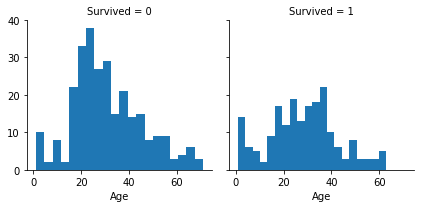

In [53]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

__Corrélation des caractéristiques numériques et ordinales__

On peut combiner plusieurs caractéristiques pour identifier les corrélations en utilisant un seul graphique. Cela peut être fait avec des caractéristiques numériques et catégoriques qui ont des valeurs numériques.

__Observations__

* 'Pclass' = 3 avait la plupart des passagers, mais la plupart n'ont pas survécu. Confirme notre hypothèse.

* Les passagers bébés de 'Pclass' = 2 et 'Pclass' = 3 ont pour la plupart survécu. En outre qualifie notre hypothèse.

* La plupart des passagers de 'Pclass' = 1 ont survécu. Confirme notre hypothèse.

* Pclass varie en fonction de la répartition par 'Age' des passagers.

__Décision__

* Envisager 'Pclass' pour la formation de notre modèle.

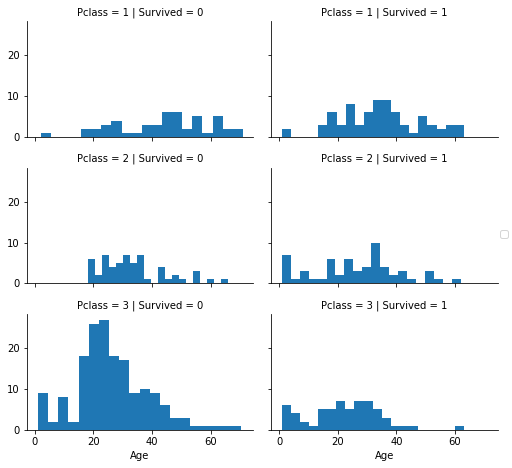

In [54]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend();

__Corrélation des caractéristiques catégorielles__

Maintenant, On peut corréler les caractéristiques catégorielles avec notre objectif de solution.

__Observations__

* Les femmes avaient un meilleur taux de survie que les hommes. Confirme la classification.

* Exception en 'Embarked' = C où les hommes avaient un taux de survie plus élevé. Cela pourrait être une corrélation entre 'Pclass' et 'Embarked' et à son tour 'Pclass' et 'Survived', corrélation pas nécessairement directe entre 'Embarked' et 'Survived'.

* Les hommes avaient un meilleur taux de survie dans la classe 'Pclass' = 3 que dans le groupe 'Pclass' = 2 pour les ports C et Q. 

* Les portes d'embarquement ont des taux de survie variables pour 'Pclass' = 3 et parmi les passagers hommes.

__Décisions__

* Ajouter une fonctionnalité de 'Sex' à l'entraînement pour notre modèle.

* Terminer et ajouter la fonction 'Embarked' pour la modélisation.

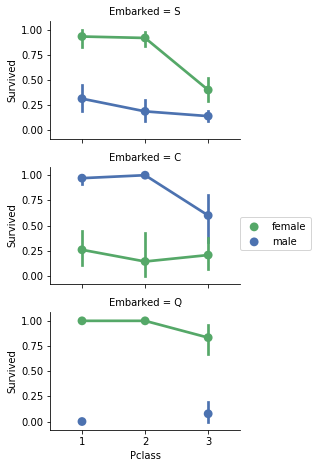

In [55]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

__Corrélation de caractéristiques catégorielles et numériques__

On peut également corréler des caractéristiques catégorielles (avec des valeurs non numériques) et des caractéristiques numériques. On peut envisager de corréler 'Embarked' (Catégorique non-numérique), 'Sex' (Non-numérique catégorique), 'Fare' (Numérique continu) avec 'Survived' (Numérique catégorique).

__Observations__

* Les passagers payant plus cher avaient une meilleure survie. Confirme notre hypothèse de création de fourchettes tarifaires.

* Le port d'embarquement est en corrélation avec les taux de survie. Confirme la corrélation.

__Décisions__

* Considérer la fonctionnalité de tarif 'Fare'.

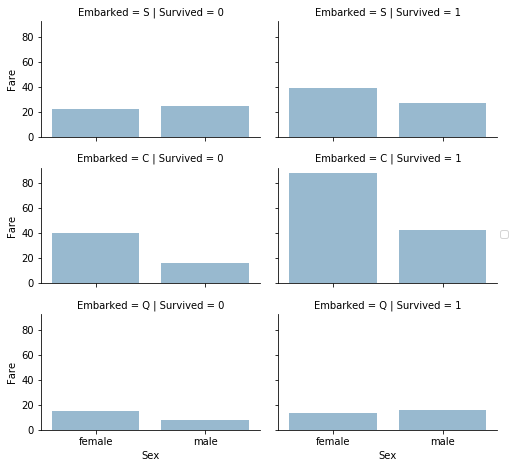

In [56]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Préparation des données

On a recueilli plusieurs hypothèses et décisions concernant nos ensembles de données et les exigences de la solution. Jusqu'à présent, on n'a pas eu à changer une seule caractéristique ou valeur pour arriver à ces derniers. On va maintenant exécuter nos décisions et nos hypothèses pour corriger, créer et compléter des objectifs.

__Correction en suppression des fonctionnalités__

* C'est un bon objectif de départ à exécuter. En supprimant les fonctionnalités, on traite moins de points de données. Ceci facilite l'analyse.

* Sur la base de nos hypothèses et décisions, on souhaite supprimer les fonctionnalités 'Cabin' et 'Ticket'.

* Notez que, le cas échéant, on effectue des opérations sur les ensembles de données d(entraînement et de test afin de rester cohérents.

In [57]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (599, 12) (292, 12) (599, 12) (292, 12)


('After', (599, 10), (292, 10), (599, 10), (292, 10))

__Création d'une nouvelle fonctionnalité extraite__

* On veut analyser si la fonctionnalité 'Name' peut être conçue pour extraire les titres et tester la corrélation entre les titres et 'Sruvived', avant de supprimer les fonctionnalités 'Name' et 'PassengerId'.

* Dans le code suivant, on extrait la fonction 'Title' en utilisant des expressions régulières. Le motif RegEx (\w+\.) correspond au premier mot qui se termine par un caractère point dans la fonctionnalité 'Name'. L'indicateur 'expand' = False renvoie un DataFrame.

__Observations__

Lorsqu'on visualise 'Title', 'Age' et 'Survived', on note les observations suivantes.

* La plupart des titres regroupent les groupes d'âge avec précision. Par exemple: Le titre 'Master' a 'Age' moyen de 5 ans.

* La survie suivant les bandes d'âge et titres varie légèrement.

* Certains titres ont pour la plupart survécu (Mme, Madame, Monsieur) ou n'ont pas (Don, Rev, Jonkheer).

__Décision__

* On décide de conserver la nouvelle fonctionnalité 'Title' pour l'entraînement par modèle.

In [58]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Don,0,1
Dr,0,3
Lady,1,0
Major,0,2
Master,0,27
Miss,135,0
Mme,1,0
Mr,0,340
Mrs,85,0


On peut remplacer de nombreux titres avec un nom plus commun ou les classer comme Rare.

In [59]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Don', 'Dr', 'Major', 'Rev'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.518519
1,Miss,0.705882
2,Mr,0.155882
3,Mrs,0.813953
4,Rare,0.200000


On peut convertir 'Title' de catégorique à ordinaire.

In [60]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Maintenant, on peut supprimer la variable 'Name' de l'ensemble des jeux de données d'entraînement et de test en toute sécurité. On n'a pas non plus besoin de la variable 'PassengerId' dans l'ensemble de données d'entraînement.

In [61]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((599, 9), (292, 10))

### Conversion des variables catégoriques

Maintenant, on peut convertir des caractéristiques qui contiennent des chaînes en valeurs numériques. Ceci est requis par la plupart des algorithmes de machine learning. Cela nous aidera également à atteindre notre objectif.

On commençe par convertir la fonction 'Sex' en une nouvelle fonctionnalité numérique où 'female' = 1 et 'male' = 0.

In [62]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Compléter une fonctionnalité numérique continue

Maintenant, on commence à estimer et compléter les fonctionnalités avec des valeurs manquantes. On va d'abord faire cela pour la fonction 'Age'.

On peut considérer trois méthodes pour compléter une caractéristique continue numérique.

1. Un moyen simple est de générer des nombres aléatoires entre la moyenne et l'écart-type.

2. Une façon plus précise de deviner les valeurs manquantes est d'utiliser d'autres caractéristiques corrélées. Dans notre cas, nous notons la corrélation entre 'Age', 'Sex' et 'Pclass'. Valider les valeurs d'âge en utilisant des valeurs médianes pour l'âge dans les ensembles de combinaisons de caractéristiques 'Pclass' et 'Sex'. Donc, l'âge médian pour 'Pclass' = 1 et 'Sex' = 0, 'Pclass' = 1 et 'Sex' = 1, et ainsi de suite ...

3. Combinez les méthodes 1 et 2. Ainsi, au lieu de deviner les valeurs d'âge basées sur la médiane, utilisez des nombres aléatoires entre la moyenne et l'écart type, basés sur des ensembles de combinaisons de classes et de genres.

Les méthodes 1 et 3 introduiront du bruit aléatoire dans nos modèles. Les résultats de plusieurs exécutions peuvent varier. Nous préférons la méthode 2.

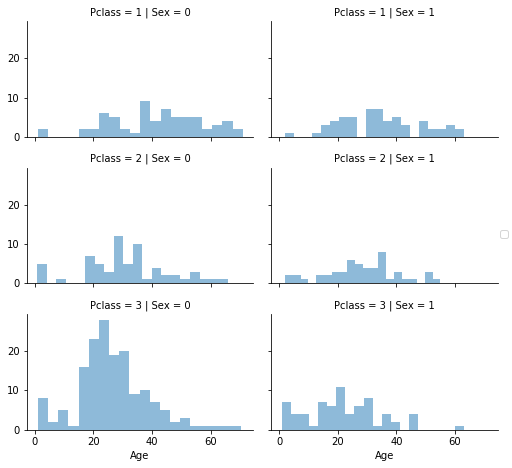

In [63]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

On commence par préparer un tableau vide pour contenir les valeurs d'âge supposées basées sur les combinaisons 'Pclass' x 'Sex'.

In [64]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Maintenant, on itére sur 'Sex' (0 ou 1) et 'Pclass' (1, 2, 3) pour calculer les valeurs supposées de l'âge pour les six combinaisons.

In [65]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


On va créer des 'AgeBands' et déterminer les corrélations avec 'Survived'.

In [66]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.071, 14.2]",0.576923
1,"(14.2, 28.4]",0.332168
2,"(28.4, 42.6]",0.484663
3,"(42.6, 56.8]",0.310811
4,"(56.8, 71.0]",0.333333


On replaçe 'Age' par 'AgeBands'.

In [67]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 28), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 42), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 42) & (dataset['Age'] <= 56), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 56, 'Age']=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(14.2, 28.4]"
1,1,1,1,2,1,0,71.2833,C,3,"(28.4, 42.6]"
2,1,3,1,1,0,0,7.9250,S,2,"(14.2, 28.4]"
3,1,1,1,2,1,0,53.1000,S,3,"(28.4, 42.6]"
4,0,3,0,2,0,0,8.0500,S,1,"(28.4, 42.6]"


On peut supprimer la variable 'AgeBands'.

In [68]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Nouvelle fonctionnalité combinant des fonctionnalités existantes

On peut créer une nouvelle fonctionnalité pour 'FamilySize' qui combine 'Parch' et 'SibSp'. Cela nous permettra de supprimer 'Parch' et 'SibSp' de notre jeux de données.

In [69]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.666667
2,3,0.608108
1,2,0.517544
6,7,0.444444
0,1,0.320113
5,6,0.214286
4,5,0.083333
7,8,0.000000
8,11,0.000000


On peut créer une autre fonctionnalité appelée 'IsAlone'.

In [70]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.495935
1,1,0.320113


On peut supprimer les fonctionnalités 'Parch', 'SibSp' et 'FamilySize' en faveur de 'IsAlone'.

In [71]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


On peut également créer une fonctionnalité artificielle combinant 'Pclass' et 'Age'.

In [72]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Compléter une caractéristique catégorielle

La fonction 'Embarked' prend les valeurs S, Q, C en fonction du port d'embarquement. Notre ensemble de données d'apprentissage a deux valeurs manquantes. On remplit simplement ceux-ci avec l'occurance la plus commune.

In [73]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [74]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.517241
1,Q,0.462963
2,S,0.349650


### Conversion d'une fonctionnalité catégorielle en numérique

On peut maintenant convertir la fonction 'Embarked' en créant une nouvelle fonctionnalité numérique.

In [75]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Compléter et convertir une caractéristique numérique

On peut maintenant compléter la fonction 'Fare' pour une seule valeur manquante dans l'ensemble de données de test en utilisant la valeur qui se produit le plus fréquemment pour cette fonctionnalité. 

Notez qu'on ne crée pas de nouvelle fonctionnalité intermédiaire ou qu'on ne fait aucune analyse supplémentaire pour la corrélation afin de deviner la fonctionnalité manquante car on ne remplaçe qu'une seule valeur. L'objectif d'achèvement atteint l'exigence souhaitée pour que l'algorithme du modèle fonctionne sur des valeurs non manquantes.

In [76]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,600,1,1,0,3,56.9292,1,0.0,0,3
1,601,1,2,1,1,27.0000,0,3.0,0,2
2,602,0,3,0,1,7.8958,0,1.0,1,3
3,603,0,1,0,2,42.4000,0,1.0,1,2
4,604,0,3,0,3,8.0500,0,1.0,1,9


On peut aussi créer un 'FareBand'

In [77]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.925]",0.256410
1,"(7.925, 14.5]",0.294521
2,"(14.5, 30.5]",0.463087
3,"(30.5, 512.329]",0.560811


Convertir la fonction 'Fare' en valeurs ordinales basées sur 'FareBand'.

In [78]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.92, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.92) & (dataset['Fare'] <= 14.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.5) & (dataset['Fare'] <= 30.5), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 30.5, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


L'ensemble test aussi.

In [79]:
test_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,600,1,1,0,3,3,1,0.0,0,3
1,601,1,2,1,1,2,0,3.0,0,2
2,602,0,3,0,1,0,0,1.0,1,3
3,603,0,1,0,2,3,0,1.0,1,2
4,604,0,3,0,3,1,0,1.0,1,9
5,605,1,1,0,2,2,1,1.0,1,2
6,606,0,3,0,2,2,0,1.0,0,6
7,607,0,3,0,2,0,0,1.0,1,6
8,608,1,1,0,1,2,0,1.0,1,1
9,609,1,2,1,1,3,1,3.0,0,2


## Modéles, prédictions et résolution

On est maintenant prêts à former un modèle et à prédire la solution requise. On peut choisir parmi plusieurs algorithmes de modélisation prédictive. On devra comprendre le type de problème et l'exigence de solution à affiner à quelques modèles sélectionnés qu'on peut évaluer. Notre problème est un problème de classification. On va tester les modèles suivants :

* Logistic Regression. 
* k-Nearest Neighbors. 
* Support Vector Machines.
* Naive Bayes classifier.
* Decision Tree.
* Random Forrest.
* Artificial neural network.

In [80]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId","Survived"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((599, 8), (599,), (292, 8))

La régression logistique est un modèle utile à exécuter tôt dans le flux de travail. La régression logistique mesure la relation entre la variable dépendante catégorielle (caractéristique) et une ou plusieurs variables indépendantes (caractéristiques) en estimant les probabilités à l'aide d'une fonction logistique, qui est la distribution logistique cumulative.

Notez le score de confiance généré par le modèle basé sur notre jeu de données d'entraînement.

In [81]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.63

On peut utiliser la régression logistique pour valider nos hypothèses et nos décisions en matière de création de fonctionnalités et d'achèvement des objectifs. Cela peut être fait en calculant le coefficient des entités dans la fonction de décision.

Les coefficients positifs augmentent les logarithmes de la réponse (et donc augmentent la probabilité), et les coefficients négatifs diminuent les log-chances de la réponse (et donc la probabilité).

* 'Sex' est le coefficient positivique le plus élevé, ce qui implique que la valeur 'Sex' augmente (male: 0 à female: 1), la probabilité de 'Survived' = 1 augmente le plus.

* Inversement lorsque 'Pclass' augmente, la probabilité de 'Survived' = 1 diminue.

* De cette façon, 'Age*Class' est un bonne caractéristique à modéliser car il a la deuxième corrélation négative la plus élevée avec 'Survived'.

* 'Title' est ainsi la deuxième corrélation positive la plus élevée.

In [82]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.165892
5,Title,0.436793
6,IsAlone,0.419303
4,Embarked,0.308476
7,Age*Class,0.177820
3,Fare,0.075845
2,Age,-0.647341
0,Pclass,-1.184936


Ensuite, on modélise en utilisant des machines vectorielles de support (SVM) qui sont des modèles d'apprentissage supervisés avec des algorithmes d'apprentissage associés qui analysent les données utilisées pour la classification et l'analyse de régression. Étant donné un ensemble d'échantillons d'apprentissage, chacun marqué comme appartenant à l'une ou l'autre des deux catégories, un algorithme d'apprentissage SVM construit un modèle qui attribue de nouveaux échantillons à une catégorie ou à une autre, ce qui en fait un classificateur linéaire binaire non probabiliste.

Notez que le modèle génère un score de confiance supérieur au modèle de régression logistique.

In [83]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.14

Dans la reconnaissance de formes, l'algorithme k-Nearest Neighbors (ou k-NN en abrégé) est une méthode non paramétrique utilisée pour la classification et la régression. Un échantillon est classé par un vote majoritaire de ses voisins, l'échantillon étant assigné à la classe la plus commune parmi ses k plus proches voisins (k est un entier positif, typiquement petit). Si k = 1, alors l'objet est simplement assigné à la classe de ce voisin le plus proche.

Le score de confiance KNN est meilleur que la régression logistique et SVM.

In [84]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.47

Dans l'apprentissage automatique, les classificateurs naive_Bayes sont une famille de classificateurs probabilistes simples basés sur l'application du théorème de Bayes avec des hypothèses d'indépendance fortes (naive) entre les caractéristiques. Les classificateurs naive_Bayes sont hautement évolutifs, nécessitant un certain nombre de paramètres linéaires dans le nombre de variables (caractéristiques) dans un problème d'apprentissage.

Le score de confiance généré par le modèle est le plus bas parmi les modèles évalués jusqu'à présent.

In [85]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.63

Ce modèle utilise un arbre de décision comme un modèle prédictif qui mappe des caractéristiques (branches d'arbres) à des conclusions sur la valeur cible (feuilles d'arbres). Les modèles d'arbres où la variable cible peut prendre un ensemble fini de valeurs sont appelés arbres de classification; dans ces structures arborescentes, les feuilles représentent les étiquettes de classe et les branches représentent les conjonctions des entités qui mènent à ces étiquettes de classe. Les arbres de décision où la variable cible peut prendre des valeurs continues (généralement des nombres réels) sont appelés arbres de régression.

Le score de confiance du modèle est le plus élevé parmi les modèles évalués jusqu'à présent.

In [86]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.98

Le prochain modèle Random Forests est l'un des plus populaires. Forêts aléatoires ou forêts de décision aléatoires est une méthode d'apprentissage d'ensemble pour la classification, régression et autres tâches, qui opèrent en construisant une multitude d'arbres de décision (n_estimators = 100) au moment de l'entraînement et en sortant la classe des classes (classification) ou prédiction moyenne (régression) des arbres individuels. 

Le score de confiance du modèle est le plus élevé parmi les modèles évalués jusqu'à présent, en égalité avec l'arbre de décision. On décide d'utiliser la sortie de ce modèle (Y_pred) pour créer notre soumission de résultats.

In [87]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.98

Le perceptron est un algorithme d'apprentissage supervisé de classificateurs binaires (fonctions permettant de décider si une entrée, représentée par un vecteur de nombres, appartient à une classe spécifique ou non). C'est un type de classificateur linéaire, c'est-à-dire un algorithme de classification qui fait ses prédictions sur la base d'une fonction de prédiction linéaire combinant un ensemble de poids avec le vecteur de caractéristiques. L'algorithme permet l'apprentissage en ligne, en ce sens qu'il traite les éléments du jeu d'apprentissage un à la fois.

In [88]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.13

## Évaluation des modèles

On peut maintenant classer notre évaluation de tous les modèles pour choisir le meilleur pour notre problème. Bien que les arbres de décision et les forêts aléatoires obtiennent la même note, on choisit d'utiliser Random Forest pour corriger l'habitude qu'ont les arbres de décision de surajuster leur ensemble d'entraînement.

In [89]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes', 'Perceptron','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.98
6,Decision Tree,86.98
1,KNN,84.47
0,Support Vector Machines,83.14
2,Logistic Regression,79.63
5,Perceptron,79.13
4,Naive Bayes,78.63
